# Homework 1-1

## 1-1 Training on a function

In [1]:
# Imports of Pytorch and matplotlib and other supporting modules
 
import math

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


### Utility functions

In [2]:
# Setting default device

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

display(f'{device} is available')

dtype = torch.float
torch.set_default_device(device)

def train_loop(dataloader, model, loss_fn, optimize, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    training_loss = 0
    num_batches = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        y_pred = y_pred.unsqueeze(1)
        loss = loss_fn(y_pred, y)
        training_loss+=loss.item()

        loss.backward()
        optimize.step()
        optimize.zero_grad()
  
    training_loss /= num_batches
    return training_loss

def val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            y_pred = model(X)
            y_pred = y_pred.unsqueeze(1)
            test_loss += loss_fn(y_pred, y).item()
            correct +=(y_pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

    #if epoch % 100 == 0:
    #    display(f"Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss

def cnt_model_params(model):
    """Count model parameters"""
    count = 0
    with torch.no_grad():
        for param in model.parameters():
            count+=param.numel()
    return count

def display_model_info(model_name, model):
    """ Display model information"""
    count = 0
    for module in model.modules():
        if isinstance(module, nn.Module):
            count+=1
    display(model)
    display(f"{model_name}. parameters: {cnt_model_params(model)}")

'cuda is available'

### Creating models

In [3]:
class CosNetwork1(nn.Module):
        """second DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 97),
                nn.ReLU(),
                nn.Linear(97, 98),
                nn.ReLU(),
                nn.Linear(98, 98),
                nn.ReLU(),
                nn.Linear(98, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              #x=self.flatten(x)
              logits = self.linear_relu_stack(x)
              return logits
        
class CosNetwork2(nn.Module):
        """second DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 40),
                nn.ReLU(),
                nn.Linear(40, 80),
                nn.ReLU(),
                nn.Linear(80, 80),
                nn.ReLU(),
                nn.Linear(80, 80),
                nn.ReLU(),
                nn.Linear(80, 40),
                nn.ReLU(),
                nn.Linear(40, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              #x=self.flatten(x)
              logits = self.linear_relu_stack(x)
              return logits

class CosNetwork3(nn.Module):
        """Third DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 138),
                nn.ReLU(),
                nn.Linear(138, 138),
                nn.ReLU(),
                nn.Linear(138, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              logits = self.linear_relu_stack(x)
              return logits
        
cos_model1, cos_model2, cos_model3 = CosNetwork1(), CosNetwork2(), CosNetwork3()
        
display(cnt_model_params(nn.Linear(138, 138)), cnt_model_params(nn.Linear(120,1)))
#cos_model1, cos_model2, cos_model3 = CosNetwork(), CosNetwork2(), CosNetwork3()

display_model_info("cos_model1", cos_model1)
display_model_info("cos_model2", cos_model2)
display_model_info("cos_model3", cos_model3)


19182

121

CosNetwork1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=97, bias=True)
    (1): ReLU()
    (2): Linear(in_features=97, out_features=98, bias=True)
    (3): ReLU()
    (4): Linear(in_features=98, out_features=98, bias=True)
    (5): ReLU()
    (6): Linear(in_features=98, out_features=1, bias=True)
    (7): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model1. parameters: 19599'

CosNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=80, bias=True)
    (3): ReLU()
    (4): Linear(in_features=80, out_features=80, bias=True)
    (5): ReLU()
    (6): Linear(in_features=80, out_features=80, bias=True)
    (7): ReLU()
    (8): Linear(in_features=80, out_features=40, bias=True)
    (9): ReLU()
    (10): Linear(in_features=40, out_features=1, bias=True)
    (11): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model2. parameters: 19601'

CosNetwork3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=138, bias=True)
    (1): ReLU()
    (2): Linear(in_features=138, out_features=138, bias=True)
    (3): ReLU()
    (4): Linear(in_features=138, out_features=1, bias=True)
    (5): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model3. parameters: 19597'

### Training & Testing Loop

In [4]:
x, x2 = torch.utils.data.random_split(torch.linspace(-math.pi, math.pi, 20000, dtype=dtype), [16000, 4000], generator=torch.Generator(device=torch.device('cuda')).manual_seed(42))
x, x2 = torch.Tensor([b for idx, b in enumerate(x.dataset) if idx in x.indices]).to(device), torch.Tensor([c for idx, c in enumerate(x2.dataset) if idx in x2.indices]).to(device)
# torch.linspace(-math.pi, math.pi, 10000, dtype=dtype)
y = torch.cos(x)
y2 = torch.cos(x2)

lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()

loss_fn = torch.nn.MSELoss()
epochs = 100
lr = .01
batch_size=128
optimizer1 = torch.optim.SGD(cos_model1.parameters(), lr=lr)
train_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
#val_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
val_dataloader = DataLoader(TensorDataset(x2.unsqueeze(1),y2.unsqueeze(1)), batch_size=batch_size)
patience = 20
best_val_loss = float('inf')
epochs_without_improvement = 0

display("Training & eval: cos1 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model1, loss_fn, optimizer1, epoch)
    val_loss = val_loop(val_dataloader, cos_model1, loss_fn, epoch)

    if epoch % 2 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx1.append(epoch)
        lossy1.append(test_loss)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx1.append(epoch)
            lossy1.append(test_loss)
        break
display("Done")

optimizer2 = torch.optim.SGD(cos_model2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos2 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model2, loss_fn, optimizer2, epoch)
    val_loss = val_loop(val_dataloader, cos_model2, loss_fn, epoch)

    if epoch % 2 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx2.append(epoch)
        lossy2.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx2.append(epoch)
            lossy2.append(test_loss)
        break
display("Done")

optimizer3 = torch.optim.SGD(cos_model3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos3 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model3, loss_fn, optimizer3, epoch)
    val_loss = val_loop(val_dataloader, cos_model3, loss_fn, epoch)

    if epoch % 2 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx3.append(epoch)
        lossy3.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx3.append(epoch)
            lossy3.append(test_loss)
        break
display("Done")

'Training & eval: cos1 model'

'Epoch 0. Train loss: 0.07052315088599789. Test loss: 0.7766262141210518.'

'Epoch 2. Train loss: 0.050823925926680204. Test loss: 0.4815303599464187.'

'Epoch 4. Train loss: 0.0038422705915605775. Test loss: 0.016356211103811802.'

'Epoch 6. Train loss: 0.0008340812002538769. Test loss: 0.00706126542399943.'

'Epoch 8. Train loss: 0.0006666736649257245. Test loss: 0.005158296132492524.'

'Epoch 10. Train loss: 0.0004962664513016079. Test loss: 0.00427802639546826.'

'Epoch 12. Train loss: 0.00042569322920076047. Test loss: 0.003820669031824764.'

'Epoch 14. Train loss: 0.0004010088626318975. Test loss: 0.0035710409574676305.'

'Epoch 16. Train loss: 0.00038996728706567295. Test loss: 0.003402277023184297.'

'Epoch 18. Train loss: 0.00038092934229527487. Test loss: 0.0032414087625625143.'

'Epoch 20. Train loss: 0.00039179531332524673. Test loss: 0.0030700182524014963.'

'Epoch 22. Train loss: 0.00039948981271231785. Test loss: 0.002891939107740882.'

'Epoch 24. Train loss: 0.0003983469876039578. Test loss: 0.002728769008420784.'

'Epoch 26. Train loss: 0.00038872325869817817. Test loss: 0.002582955077027549.'

'Epoch 28. Train loss: 0.0003780199411019112. Test loss: 0.0024446977146226345.'

'Epoch 30. Train loss: 0.0003653772469115211. Test loss: 0.002309455383254999.'

'Epoch 32. Train loss: 0.0003485498160654288. Test loss: 0.002175195729847701.'

'Epoch 34. Train loss: 0.0003310852096680037. Test loss: 0.002052290241337573.'

'Epoch 36. Train loss: 0.00031330761504917606. Test loss: 0.0019357135925872626.'

'Epoch 38. Train loss: 0.00029620676355108345. Test loss: 0.0018311182811743265.'

'Epoch 40. Train loss: 0.00028004100385464883. Test loss: 0.00173755662912356.'

'Epoch 42. Train loss: 0.0002656511928259988. Test loss: 0.0016569319327288667.'

'Epoch 44. Train loss: 0.0002528349507223879. Test loss: 0.0015891641057983463.'

'Epoch 46. Train loss: 0.0002424474252680966. Test loss: 0.001533263292294862.'

'Epoch 48. Train loss: 0.00023501767063652325. Test loss: 0.0014843556624448695.'

'Epoch 50. Train loss: 0.00022995100611595377. Test loss: 0.0014280640889623442.'

'Epoch 52. Train loss: 0.0002277913734078787. Test loss: 0.0014006094414504844.'

'Epoch 54. Train loss: 0.00022537252081693282. Test loss: 0.0013709123389844535.'

'Epoch 56. Train loss: 0.0002216058980822595. Test loss: 0.0013439853132837243.'

'Epoch 58. Train loss: 0.00021981937872504886. Test loss: 0.0013254124966124436.'

'Epoch 60. Train loss: 0.00021928684607648563. Test loss: 0.001310639637850386.'

'Epoch 62. Train loss: 0.0002191813988629292. Test loss: 0.001297635624293747.'

'Epoch 64. Train loss: 0.0002190698022560582. Test loss: 0.001285239151687989.'

'Epoch 66. Train loss: 0.00021880336068610972. Test loss: 0.0012728334767242444.'

'Epoch 68. Train loss: 0.000218283410552516. Test loss: 0.001259721943998926.'

'Epoch 70. Train loss: 0.00021738921292734404. Test loss: 0.0012452683661479114.'

'Epoch 72. Train loss: 0.0002161123270628309. Test loss: 0.0012296512004787985.'

'Epoch 74. Train loss: 0.00021450703970097605. Test loss: 0.0012129810043823852.'

'Epoch 76. Train loss: 0.00021259181350944978. Test loss: 0.0011951637798546244.'

'Epoch 78. Train loss: 0.00021042342571652738. Test loss: 0.0011767179653681126.'

'Epoch 80. Train loss: 0.00020810416663162102. Test loss: 0.001158018811416639.'

'Epoch 82. Train loss: 0.00020568094717263906. Test loss: 0.0011392417738100846.'

'Epoch 84. Train loss: 0.00020322001056224793. Test loss: 0.001120328539806259.'

'Epoch 86. Train loss: 0.0002007050442071723. Test loss: 0.0011012976014210807.'

'Epoch 88. Train loss: 0.00019814469109683585. Test loss: 0.001082459296871452.'

'Epoch 90. Train loss: 0.00019562657802774908. Test loss: 0.0010641236882864558.'

'Epoch 92. Train loss: 0.00019321193139973757. Test loss: 0.0010463490854983881.'

'Epoch 94. Train loss: 0.00019085773361764068. Test loss: 0.0010290847297285133.'

'Epoch 96. Train loss: 0.00018859536163472513. Test loss: 0.0010123333024769643.'

'Epoch 98. Train loss: 0.00018641581261634598. Test loss: 0.0009960406243672004.'

'Done'

'Training & eval: cos2 model'

'Epoch 0. Train loss: 0.37121395980915983. Test loss: 0.5293299787299475.'

'Epoch 2. Train loss: 0.17890850962733384. Test loss: 0.43595998986347695.'

'Epoch 4. Train loss: 0.02998080400138497. Test loss: 0.35812306057960086.'

'Epoch 6. Train loss: 0.0016051805597398071. Test loss: 0.04590659211771708.'

'Epoch 8. Train loss: 0.0046571707989742205. Test loss: 0.03739968051786491.'

'Epoch 10. Train loss: 0.001326336610301496. Test loss: 0.012090430779153394.'

'Epoch 12. Train loss: 0.0008201917608557779. Test loss: 0.007007046649505355.'

'Epoch 14. Train loss: 0.000589727374810991. Test loss: 0.004686554050522318.'

'Epoch 16. Train loss: 0.00039959882366702004. Test loss: 0.003094476573664906.'

'Epoch 18. Train loss: 0.0003168151777624644. Test loss: 0.0025150522012609144.'

'Epoch 20. Train loss: 0.00028029291025023897. Test loss: 0.0024962762892926094.'

'Epoch 22. Train loss: 0.00026086204153125434. Test loss: 0.0023428678842947193.'

'Epoch 24. Train loss: 0.00025712564531295355. Test loss: 0.0019388848049857188.'

'Epoch 26. Train loss: 0.0002676116592749622. Test loss: 0.0016121417191925502.'

'Epoch 28. Train loss: 0.0002843433003583868. Test loss: 0.0014035375883167944.'

'Epoch 30. Train loss: 0.00030356857624406076. Test loss: 0.0012751588633364008.'

'Epoch 32. Train loss: 0.0003217066085463216. Test loss: 0.0012082831198085842.'

'Epoch 34. Train loss: 0.0003349505875439718. Test loss: 0.0011757334389130847.'

'Epoch 36. Train loss: 0.00034226690182470067. Test loss: 0.0011555673074781225.'

'Epoch 38. Train loss: 0.0003446587145375588. Test loss: 0.001135895024049205.'

'Epoch 40. Train loss: 0.00034321138537592334. Test loss: 0.001113078749426677.'

'Epoch 42. Train loss: 0.0003382206058415278. Test loss: 0.0010864113586990243.'

'Epoch 44. Train loss: 0.00033223387895363034. Test loss: 0.001057618390063908.'

'Epoch 46. Train loss: 0.0003264250891412246. Test loss: 0.001028447577255065.'

'Epoch 48. Train loss: 0.0003215671898517769. Test loss: 0.0010012565990678013.'

'Epoch 50. Train loss: 0.00031724870359018097. Test loss: 0.0009745764543538371.'

'Epoch 52. Train loss: 0.00031206391266807996. Test loss: 0.0009451405786649048.'

'Epoch 54. Train loss: 0.00030595597623778306. Test loss: 0.0009115658411076311.'

'Epoch 56. Train loss: 0.00029876681831522944. Test loss: 0.0008763420987634163.'

'Epoch 58. Train loss: 0.00029092408394774336. Test loss: 0.0008393941665296722.'

'Epoch 60. Train loss: 0.00028263640596875916. Test loss: 0.000802552774601395.'

'Epoch 62. Train loss: 0.00027427350845925247. Test loss: 0.0007667063767797799.'

'Epoch 64. Train loss: 0.00026605377159783216. Test loss: 0.0007330392302122846.'

'Epoch 66. Train loss: 0.00025829195483833444. Test loss: 0.0007023100943115423.'

'Epoch 68. Train loss: 0.00025125794775411234. Test loss: 0.0006752435842614091.'

'Epoch 70. Train loss: 0.00024500849979833104. Test loss: 0.0006515491862764122.'

'Epoch 72. Train loss: 0.00023948502996792254. Test loss: 0.0006308889615880275.'

'Epoch 74. Train loss: 0.00023458092987262448. Test loss: 0.0006128773788383057.'

'Epoch 76. Train loss: 0.0002301388471422463. Test loss: 0.0005966050986074833.'

'Epoch 78. Train loss: 0.00022605310739609051. Test loss: 0.0005822141463447394.'

'Epoch 80. Train loss: 0.0002223707436446798. Test loss: 0.0005693386783134358.'

'Epoch 82. Train loss: 0.00021892846972786372. Test loss: 0.000557661541554566.'

'Epoch 84. Train loss: 0.00021579922470693445. Test loss: 0.000547436697258874.'

'Epoch 86. Train loss: 0.00021295627774681235. Test loss: 0.000538339421948919.'

'Epoch 88. Train loss: 0.0002103499424149291. Test loss: 0.0005302154005111248.'

'Epoch 90. Train loss: 0.0002079511535083185. Test loss: 0.0005229429792024121.'

'Epoch 92. Train loss: 0.0002057521143988552. Test loss: 0.0005164524680232319.'

'Epoch 94. Train loss: 0.0002037114766742789. Test loss: 0.0005105495550097316.'

'Epoch 96. Train loss: 0.00020181138063722414. Test loss: 0.0005051283482711.'

'Epoch 98. Train loss: 0.00020002982463985576. Test loss: 0.0005001158795963079.'

'Done'

'Training & eval: cos3 model'

'Epoch 0. Train loss: 0.0163560583316647. Test loss: 1.5506377918270573.'

'Epoch 2. Train loss: 0.034488712092990564. Test loss: 0.262765567058068.'

'Epoch 4. Train loss: 0.0010662153615194044. Test loss: 0.03506445427774452.'

'Epoch 6. Train loss: 0.0023841943381985404. Test loss: 0.014762733285351715.'

'Epoch 8. Train loss: 0.0007285931497469278. Test loss: 0.006723694947140757.'

'Epoch 10. Train loss: 0.000381334194117521. Test loss: 0.006300344232840871.'

'Epoch 12. Train loss: 0.00030647067378538397. Test loss: 0.006860392858470732.'

'Epoch 14. Train loss: 0.0002706713542228272. Test loss: 0.0065745186207095685.'

'Epoch 16. Train loss: 0.00023886815445939646. Test loss: 0.005694242546979922.'

'Epoch 18. Train loss: 0.00023816828382422272. Test loss: 0.004948558348360166.'

'Epoch 20. Train loss: 0.00026516093377335894. Test loss: 0.004401356668722656.'

'Epoch 22. Train loss: 0.00030594581210186786. Test loss: 0.00410764138405284.'

'Epoch 24. Train loss: 0.00036153315495909057. Test loss: 0.004000954897435349.'

'Epoch 26. Train loss: 0.00041143429429018854. Test loss: 0.00400718616310769.'

'Epoch 28. Train loss: 0.0004495098780214164. Test loss: 0.00403023169599237.'

'Epoch 30. Train loss: 0.0004759098368740524. Test loss: 0.004034292079040824.'

'Epoch 32. Train loss: 0.0004920602059156635. Test loss: 0.004004822445722311.'

'Epoch 34. Train loss: 0.000497063342089632. Test loss: 0.003937932696885582.'

'Epoch 36. Train loss: 0.0004928202499173722. Test loss: 0.003839647866584528.'

'Epoch 38. Train loss: 0.0004811840947382109. Test loss: 0.0037173001180690335.'

'Epoch 40. Train loss: 0.0004648449696285297. Test loss: 0.003580203881597299.'

'Epoch 42. Train loss: 0.000445745783708162. Test loss: 0.00343502337125301.'

'Epoch 44. Train loss: 0.00042495177785906434. Test loss: 0.0032918879119279154.'

'Epoch 46. Train loss: 0.00040467912204854886. Test loss: 0.00315929039172147.'

'Epoch 48. Train loss: 0.00038593447798099587. Test loss: 0.0030381307414444336.'

'Epoch 50. Train loss: 0.0003687839209818122. Test loss: 0.002928270940628863.'

'Epoch 52. Train loss: 0.0003536446197313694. Test loss: 0.00282892015242453.'

'Epoch 54. Train loss: 0.00034035092630804796. Test loss: 0.002741073986818776.'

'Epoch 56. Train loss: 0.00032913948651481915. Test loss: 0.002666317257091322.'

'Epoch 58. Train loss: 0.0003204123126471643. Test loss: 0.002604532387316283.'

'Epoch 60. Train loss: 0.00031389811192514115. Test loss: 0.002552720944780873.'

'Epoch 62. Train loss: 0.000309064676682965. Test loss: 0.0025086723618592544.'

'Epoch 64. Train loss: 0.0003056375920438086. Test loss: 0.0024708715078141097.'

'Epoch 66. Train loss: 0.0003031091012435354. Test loss: 0.00243704141198009.'

'Epoch 68. Train loss: 0.0003011998078560509. Test loss: 0.002405848984572856.'

'Epoch 70. Train loss: 0.0002996794214222689. Test loss: 0.0023767103753584706.'

'Epoch 72. Train loss: 0.0002984187083639398. Test loss: 0.0023488970722844726.'

'Epoch 74. Train loss: 0.0002972494887455355. Test loss: 0.00232131087913956.'

'Epoch 76. Train loss: 0.00029591923669897825. Test loss: 0.0022934983844198342.'

'Epoch 78. Train loss: 0.0002944620553823967. Test loss: 0.0022651872207077872.'

'Epoch 80. Train loss: 0.00029282167612503863. Test loss: 0.0022365223856315453.'

'Epoch 82. Train loss: 0.00029097556116253995. Test loss: 0.0022075359725448607.'

'Epoch 84. Train loss: 0.00028893385412533237. Test loss: 0.0021781616994509534.'

'Epoch 86. Train loss: 0.00028678034851208165. Test loss: 0.002148773043402663.'

'Epoch 88. Train loss: 0.00028448883131827074. Test loss: 0.0021191373246196576.'

'Epoch 90. Train loss: 0.00028209648350792805. Test loss: 0.0020890878857411366.'

'Epoch 92. Train loss: 0.0002795356094640624. Test loss: 0.002058982656935271.'

'Epoch 94. Train loss: 0.0002769009748209612. Test loss: 0.0020291454024530253.'

'Epoch 96. Train loss: 0.000274249825814735. Test loss: 0.0019997341286295267.'

'Epoch 98. Train loss: 0.000271577621217574. Test loss: 0.0019706504424412685.'

'Done'

### Saving models

In [5]:
torch.save(cos_model1.state_dict(), 'cosmodel1_weights.pth')
torch.save(cos_model2.state_dict(), 'cosmodel2_weights.pth')
torch.save(cos_model3.state_dict(), 'cosmodel3_weights.pth')

### Plotting models

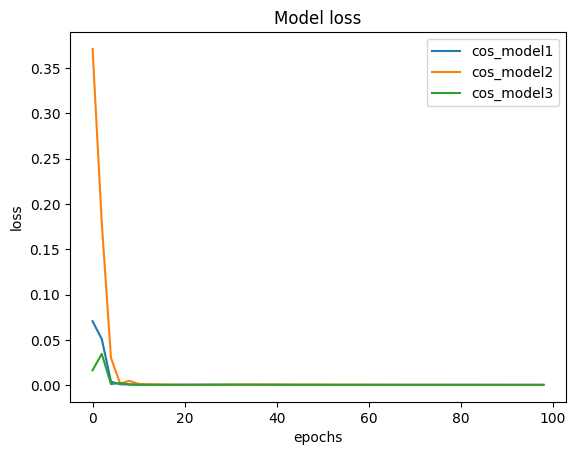

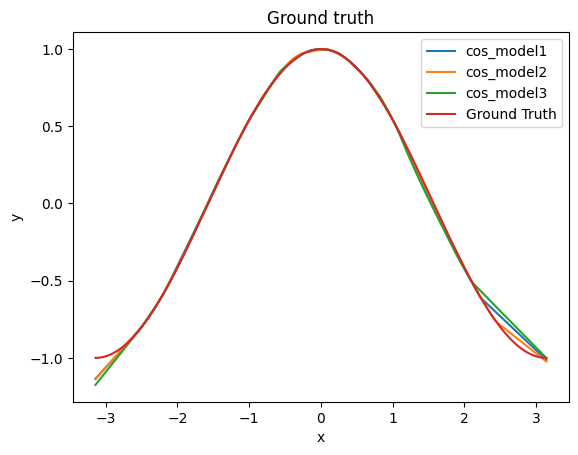

In [6]:
# Plotting model loss and ground truth for cosine neural networks
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['cos_model1','cos_model2','cos_model3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

with torch.no_grad():
    m1_y = cos_model1(x.unsqueeze(1)).cpu().numpy()
    m2_y = cos_model2(x.unsqueeze(1)).cpu().numpy()
    m3_y = cos_model3(x.unsqueeze(1)).cpu().numpy()
    x = x.cpu().numpy()
    y = y.cpu().numpy()

ax2.plot(x, m1_y, x, m2_y, x, m3_y, x, y)
ax2.set(xlabel='x',ylabel='y', title='Ground truth')
ax2.legend(labels=['cos_model1', 'cos_model2','cos_model3', 'Ground Truth'])


## 1-1. Training on actual task

In [7]:
from torchvision import datasets
from torchvision.transforms import ToTensor
training_ds = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_ds = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

### Creating models

In [8]:
class NMISTNetwork1(nn.Module):
        """First CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Flatten(1), 
            nn.Linear(18432, 128),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        
class NMISTNetwork2(nn.Module):
        """Second CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),
            nn.ReLU(),
            nn.Flatten(1), 
            nn.Linear(25600, 128),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        
class NMISTNetwork3(nn.Module):
        """Third CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),
            nn.Dropout(.25),
            nn.ReLU(),
            nn.Conv2d(64, 64, 5),
            nn.Flatten(1), 
            nn.Linear(16384, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        

nmist1, nmist2, nmist3 = NMISTNetwork1(), NMISTNetwork2(), NMISTNetwork3()
display_model_info('nmist1', nmist1)
display_model_info('nmist2', nmist2)
display_model_info('nmist3', nmist3)

NMISTNetwork1(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=18432, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist1. parameters: 2361546'

NMISTNetwork2(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=25600, out_features=128, bias=True)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist2. parameters: 3330314'

NMISTNetwork3(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): Dropout(p=0.25, inplace=False)
    (4): ReLU()
    (5): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=16384, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist3. parameters: 2253130'

### Utility functions

In [9]:
def nmist_train_loop(dataloader, model, loss_fn, optimize, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    num_batches = len(dataloader)
    train_loss, correct = 0,0
    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        optimize.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()

        loss.backward()
        optimize.step()
    
    train_loss /= num_batches
    correct /=size

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Accuracy: {(100*correct)}%, Avg loss: {train_loss}")

    return train_loss, correct
        
def nmist_val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            X = X.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

#    if epoch % 10 == 0:
#        display(f"Epoch {epoch}. Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss, correct

### Training and Testing Loop

In [10]:
lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()
accy1, accy2, accy3 = list(), list(), list()

loss_fn = torch.nn.CrossEntropyLoss()
epochs = 30
lr = 1.5e-2
batch_size=150

training_dl = DataLoader(training_ds, batch_size=batch_size)
test_dl = DataLoader(test_ds, batch_size=batch_size)

patience = 5
best_val_loss = float('inf')
epochs_without_improvement = 0

optimizer1 = torch.optim.SGD(nmist1.parameters(), lr=lr)
display("Training & eval: nmist1 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist1, loss_fn, optimizer1, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist1, loss_fn, epoch)

    if epoch%2 == 0:
        epochx1.append(epoch)
        lossy1.append(test_loss)
        accy1.append(correct)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 !=0:
            epochx1.append(epoch)
            lossy1.append(test_loss)
            accy1.append(correct)
        break
display("Done")

optimizer2 = torch.optim.SGD(nmist2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: nmist2 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist2, loss_fn, optimizer2, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist2, loss_fn, epoch)

    if epoch%2 == 0:
        epochx2.append(epoch)
        lossy2.append(test_loss)
        accy2.append(correct)

    if val_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx2.append(epoch)
            lossy2.append(test_loss)
            accy2.append(correct)
        break
display("Done")

optimizer3 = torch.optim.SGD(nmist3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: nmist3 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist3, loss_fn, optimizer3, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist3, loss_fn, epoch)

    if epoch%2 == 0:
        epochx3.append(epoch)
        lossy3.append(test_loss)
        accy3.append(correct)

    if val_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx3.append(epoch)
            lossy3.append(test_loss)
            accy3.append(correct)
        break
display("Done")

'Training & eval: nmist1 model'

'Epoch 0. Accuracy: 85.11166666666666%, Avg loss: 0.6190104283764959'

'Epoch 10. Accuracy: 96.7%, Avg loss: 0.12002741682343185'

'Epoch 20. Accuracy: 98.28333333333333%, Avg loss: 0.06126915360684507'

'Done'

'Training & eval: nmist2 model'

'Epoch 0. Accuracy: 84.01666666666667%, Avg loss: 0.6184474245831371'

'Epoch 10. Accuracy: 98.29333333333334%, Avg loss: 0.05943979916919488'

'Epoch 20. Accuracy: 99.01666666666667%, Avg loss: 0.03567273243927047'

'Convergence reached at 22'

'Done'

'Training & eval: nmist3 model'

'Epoch 0. Accuracy: 72.28166666666667%, Avg loss: 0.9241541270166636'

'Epoch 10. Accuracy: 98.47166666666666%, Avg loss: 0.05057000533415703'

'Convergence reached at 12'

'Done'

### Save models

In [11]:
torch.save(nmist1.state_dict(), 'nmist1_weights.pth')
torch.save(nmist2.state_dict(), 'nmist2_weights.pth')
torch.save(nmist3.state_dict(), 'nmist3_weights.pth')

### Plotting Models

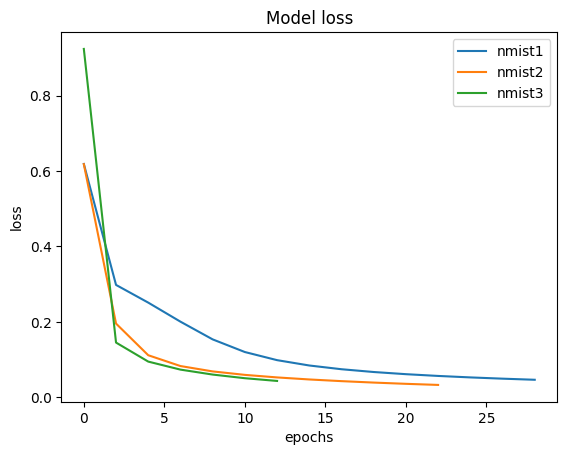

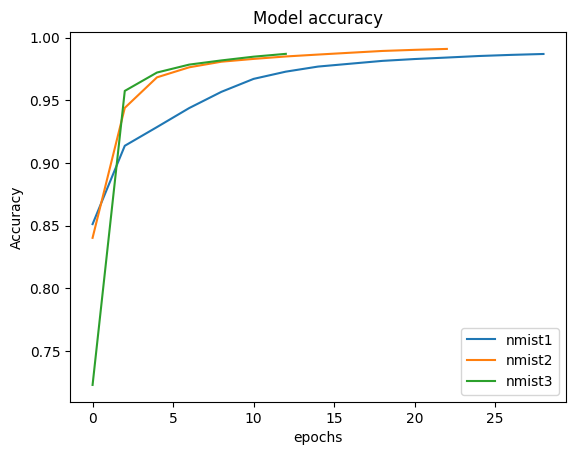

In [12]:
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['nmist1','nmist2','nmist3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

ax2.plot(epochx1, accy1, epochx2, accy2, epochx3, accy3)
ax2.set(xlabel='epochs',ylabel='Accuracy', title='Model accuracy')
ax2.legend(labels=['nmist1', 'nmist2','nmist3'])
